In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv("./data/test.csv")
test_shape = test.shape

train = pd.read_csv("./data/train.csv")
train_shape = train.shape

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


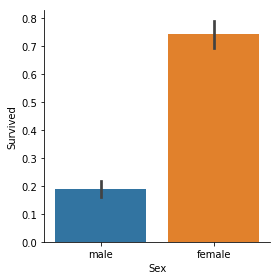

In [7]:
sns.factorplot(x="Sex", y="Survived", data=train, kind="bar")

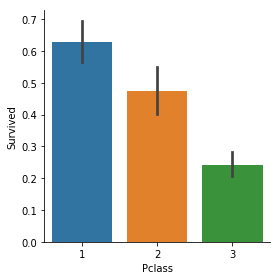

In [8]:
sns.factorplot(x="Pclass", y="Survived", data=train, kind="bar")

In [9]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels=label_names)
    return df

In [10]:
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

In [11]:
train = process_age(train, cut_points, label_names)

In [12]:
test = process_age(train, cut_points, label_names)

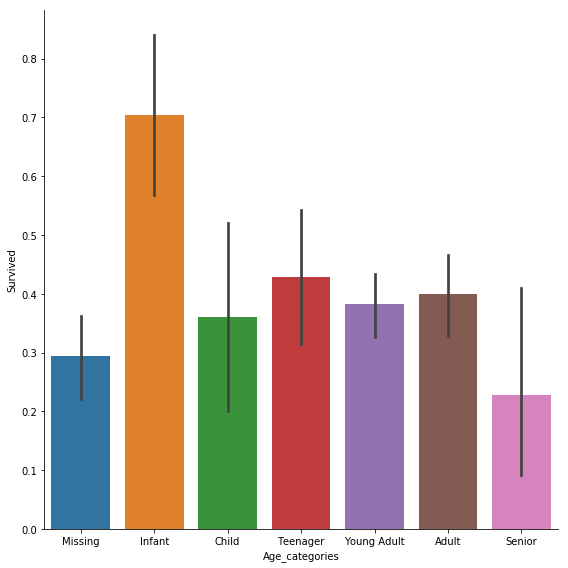

In [13]:
sns.factorplot(x="Age_categories", y="Survived", data=train, kind="bar", size=8)

In [14]:
def create_dummies(df, column_names):
    for column_name in column_names:
        dummies = pd.get_dummies(df[column_name],prefix=column_name)
        df = pd.concat([df,dummies],axis=1)
    return df

In [15]:
train = create_dummies(train, ["Pclass", "Sex", "Age_categories"])
test = create_dummies(test, ["Pclass", "Sex", "Age_categories"])

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [17]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(X=train[columns], y=train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_X, test_X, train_y, test_y = train_test_split(train[columns], train['Survived'], test_size=0.2, random_state=0)

In [22]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
accuracy

0.81005586592178769

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
lr = LogisticRegression()
cross_val_score(lr, train[columns], train['Survived'], cv=10)

array([ 0.8       ,  0.81111111,  0.7752809 ,  0.87640449,  0.80898876,
        0.78651685,  0.76404494,  0.76404494,  0.83146067,  0.80681818])

In [26]:
lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])
predictions = lr.predict(test[columns])

In [27]:
holdout_ids = test["PassengerId"]
holdout_ids.head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [28]:
submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
submission = pd.DataFrame(submission_df)

In [29]:
submission

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,1


Onto more optimizations

In [30]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior'],
      dtype='object')

In [31]:
test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior'],
      dtype='object')

In [32]:
from sklearn.preprocessing import minmax_scale

In [33]:
train["Fare"] = train["Fare"].fillna(train["Fare"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [34]:
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

In [35]:
train = create_dummies(train, ["Embarked"])
test = create_dummies(test, ["Embarked"])

In [36]:
train["SibSp_scaled"] = minmax_scale(train["SibSp"])
test["SibSp_scaled"] = minmax_scale(test["SibSp"])
train["Parch_scaled"] = minmax_scale(train["Parch"])
test["Parch_scaled"] = minmax_scale(test["Parch"])
train["Fare_scaled"] = minmax_scale(train["Fare"])
test["Fare_scaled"] = minmax_scale(test["Fare"])

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [37]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
coefficients = lr.coef_

In [39]:
feature_importance = pd.Series(index=columns, data=coefficients[0])

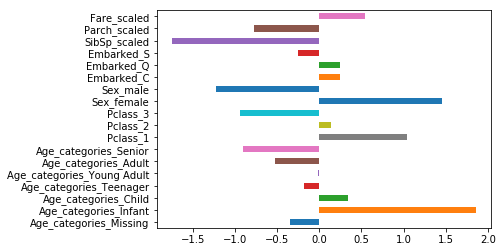

In [40]:
feature_importance.plot.barh()

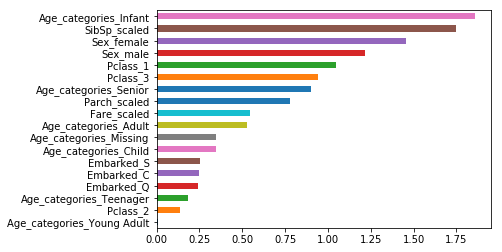

In [41]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [42]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

lr = LogisticRegression()
scores = cross_val_score(lr, train[columns], train['Survived'], cv=10)

In [43]:
accuracy = scores.mean()

In [44]:
accuracy

0.81480195210532291

In [45]:
cut_points = [0, 12, 50, 100, 1000]
label_names = ["0-12", "12-50", "50-100", "100+"]

In [46]:
def process_fare(df, cut_points, label_names):
    df["Fare_categories"] = pd.cut(df["Fare"], cut_points, labels=label_names)
    return df

In [47]:
train = create_dummies(process_fare(train, cut_points, label_names), ["Fare_categories"])
test = create_dummies(process_fare(test, cut_points, label_names), ["Fare_categories"])

In [48]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+'],
      dtype='object')

In [49]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
train["Title"] = extracted_titles.map(titles)
extracted_titles = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
test["Title"] = extracted_titles.map(titles)

In [50]:
train["Cabin_type"] = test["Cabin"].str[0]
test["Cabin_type"] = test["Cabin"].str[0]

In [51]:
train["Cabin_type"] = train["Cabin_type"].fillna('Unknown')
test["Cabin_type"] = test["Cabin_type"].fillna('Unknown')

In [52]:
train = create_dummies(train, ["Title", "Cabin_type"])
test = create_dummies(test, ["Title", "Cabin_type"])

In [53]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

In [54]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

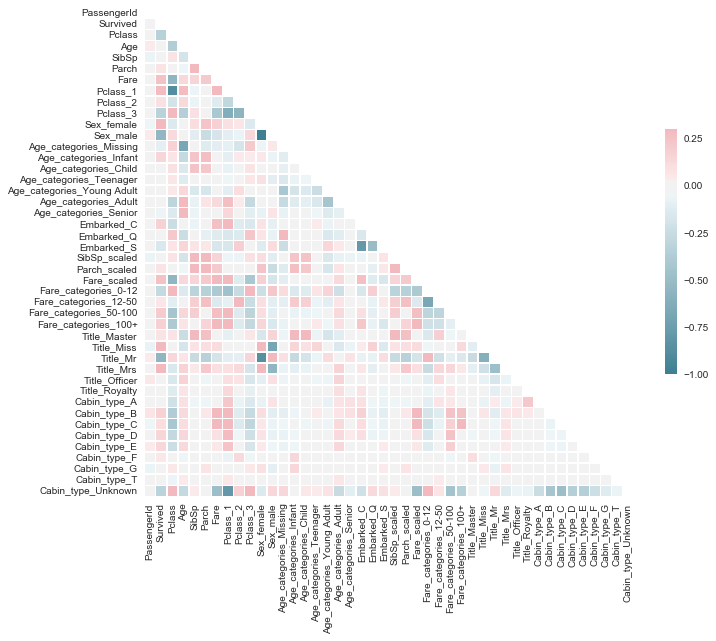

In [55]:
plot_correlation_heatmap(train)

In [56]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title', 'Cabin_type',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown'],
      dtype='object')

In [57]:
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]

In [58]:
lr = LogisticRegression()
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [59]:
optimized_columns = all_X.columns[selector.support_]

In [60]:
optimized_columns

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')

In [61]:
lr = LogisticRegression()
scores = cross_val_score(lr, train[optimized_columns], train['Survived'], cv=10)
scores.mean()

0.82265491998638074

Use SibSp and Parch to explore total relatives onboard.<br/>
Create combinations of multiple columns, for instance Pclass + Sex.<br/>
See if you can extract useful data out of the Ticket column.<br/>
Try different combinations of features to see if you can identify features that overfit less than others.<br/>

Onto model seleciton

In [67]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']
all_X = train[columns]
all_y = train['Survived']

In [69]:
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.mean()

0.82500255362614916

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
k = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(k, all_X, all_y, cv=10)
scores.mean()

0.78583844058563168

In [77]:
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(15,12),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

In [78]:
for k in range(50):
    k_neighbor = KNeighborsClassifier(n_neighbors=k+1)
    scores = cross_val_score(k_neighbor, all_X, all_y, cv=10)
    mean = scores.mean()
    knn_scores[k] = mean

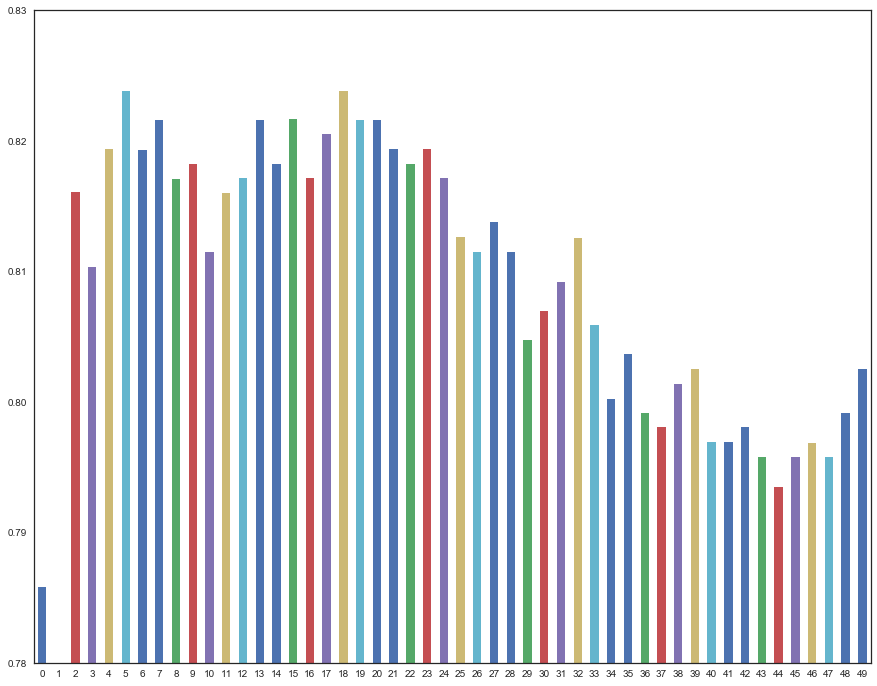

In [79]:
plot_dict(knn_scores)

In [80]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

In [81]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.824915824916


In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rand = RandomForestClassifier(random_state=1)

In [84]:
scores = cross_val_score(rand, all_X, all_y, cv=10)
scores.mean()

0.81826098059244123

In [88]:
hyperparameters = {
    "criterion": ["entropy", "gini"],
    "max_depth": [5, 10],
    "max_features": ["log2", "sqrt"],
    "min_samples_leaf": [1, 5],
    "min_samples_split": [3, 5],
    "n_estimators": [6, 9]
}

In [89]:
rand = RandomForestClassifier(random_state=1)
grid = GridSearchCV(rand, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}
0.837261503928


Contains a list of dictionaries, each containing a model name, its estimator and a dictionary of hyperparameters: 
<br />
<br />
LogisticRegression, using the following hyperparameters:
<br />
"solver": ["newton-cg", "lbfgs", "liblinear"]
<br />
<br />
KNeighborsClassifier, using the following hyperparameters:
<br />
"n_neighbors": range(1,20,2)
<br />
"weights": ["distance", "uniform"]
<br />
"algorithm": ["ball_tree", "kd_tree", "brute"]
<br />
"p": [1,2]
<br />
<br />
RandomForestClassifier, using the following hyperparameters:
<br />
"n_estimators": [4, 6, 9]
<br />
"criterion": ["entropy", "gini"]
<br />
"max_depth": [2, 5, 10]
<br />
"max_features": ["log2", "sqrt"]
<br />
"min_samples_leaf": [1, 5, 8]
<br />
"min_samples_split": [2, 3, 5]